# Number 1

Find real positive root from this equation:

$$f(x) = x^3 - 6x^2 + 11x - 6.1$$

using these methods:<br>
(a) **Graphical Method**<br>
(b) **Bisection Method**<br>
(c) **False Position**<br>
(d) **Simple Fixed-Position Iteration**<br>
(e) **Newton-Raphton**<br>
(f) **Modified Secant Method**

**Graphical Method**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [ ]:
# function f(x)
def f(x):
  return x**3 - 6*x**2 + 11*x - 6.1

Akar persamaan ditemukan: [1.054360192490538, 1.8989668479136232, 3.0466736845674642]



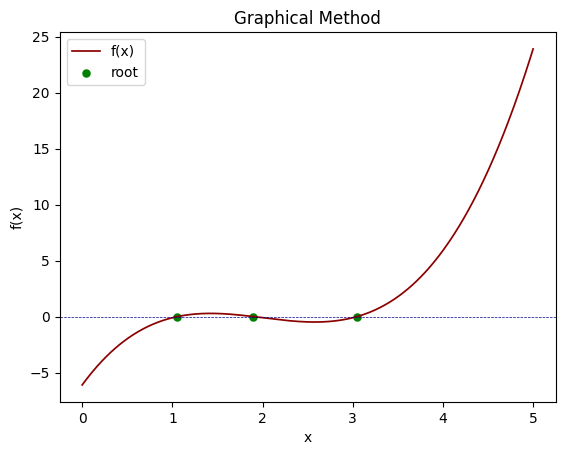

In [ ]:
# create an array of x values
x = np.linspace(0, 5, 1000)

# Buat plot fungsi f(x)
plt.plot(x, f(x), label='f(x)', color='darkred', linewidth=1.25)
plt.axhline(y=0, color='darkblue', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical Method')

# Temukan titik potong dengan sumbu-x menggunakan plot yang dibuat
tolerance = 0.0005
roots = []
for i in range(len(x) - 1):
    if f(x[i]) * f(x[i + 1]) < 0:
        initial_guess = (x[i] + x[i + 1]) / 2  # Use the midpoint as the initial guess
        root = optimize.root_scalar(f, method='brentq', bracket=[x[i], x[i + 1]], x0=initial_guess, xtol=tolerance)
        roots.append(root.root)

# Buat Point di setiap roots
plt.scatter(roots, [0, 0, 0], label='root', color='green', linewidth=0.1)
plt.legend()

if root is not None:
    print(f"Akar persamaan ditemukan: {roots}\n")
else:
    print("Akar persamaan tidak ditemukan dalam range yang diberikan.\n")

plt.show()

**Bisection Method**

In [ ]:
def bisection_method(a, b, tol):
    if f(a) * f(b) >= 0:
        print("Bisection method requires that f(a) and f(b) have opposite signs.")
        return None

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
            print(a, b)
        else:
            a = c
            print(a, b)

    return (a + b) / 2

# Set the initial interval [a, b] and tolerance level
a = 0.5
b = 1.5
tol = 0.0005

# Find the positive real root using the bisection method
root = bisection_method(a, b, tol)
print(f"\nThe positive real root is approximately: {root}")

1.0 1.5
1.0 1.25
1.0 1.125
1.0 1.0625
1.03125 1.0625
1.046875 1.0625
1.046875 1.0546875
1.05078125 1.0546875
1.052734375 1.0546875
1.0537109375 1.0546875

The positive real root is approximately: 1.05419921875


**False Position Method**

In [ ]:
def false_position_method(a, b, tol, max_iter=1000):
    if f(a) * f(b) >= 0:
        print("False position method requires that f(a) and f(b) have opposite signs.")
        return None

    for _ in range(max_iter):
        c = a - (f(a) * (b - a)) / (f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        elif f(c) * f(a) < 0:
            b = c
            print(a, b)
        else:
            a = c
            print(a, b)

    return c

# Set the initial interval [a, b] and tolerance level
a = 0.5
b = 1.5
tol = 0.0005

# Find the positive real root using the false position method
root = false_position_method(a, b, tol)
print(f"\nThe positive real root is approximately: {root}") 

0.5 1.3777777777777778
0.5 1.2683348542337063
0.5 1.1850903109072501
0.5 1.1296943444329874
0.5 1.0961561510123166
0.5 1.0770299184509906
0.5 1.0664984745231656
0.5 1.0608123014597415
0.5 1.057774874959906
0.5 1.05616164286431
0.5 1.0553074432364236
0.5 1.0548558812046376

The positive real root is approximately: 1.0546173733115398


**Simple Fixed-Point Iteration Method**

In [ ]:
def g(x):
    return (x**3 - 6*x**2 + 6.1) / 11

def simple_fixed_point_iteration(x0, tol, max_iter=1000):
    for _ in range(max_iter):
        x1 = g(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
        print(x0)

    print("The method did not converge within the maximum number of iterations.")
    return None

# Set the initial guess and tolerance level
x0 = 0
tol = 0.0005

# Find the positive real root using the simple fixed-point iteration method
root = simple_fixed_point_iteration(x0, tol)
print(f"\nThe positive real root is approximately: {root}")

0.5545454545454546
0.4023100198073902
0.4721813739126847
0.44250398336220653
0.4556170867090174
0.4499144158129147
0.4524122843778493
0.4513215529334085

The positive real root is approximately: 0.4517984853308827


**Newton-Raphson**

0.5545454545454546
0.872424066528517
1.0167077717991828
1.0521795002248355
1.0543428241575883

The positive real root is approximately: 1.0543507259711422



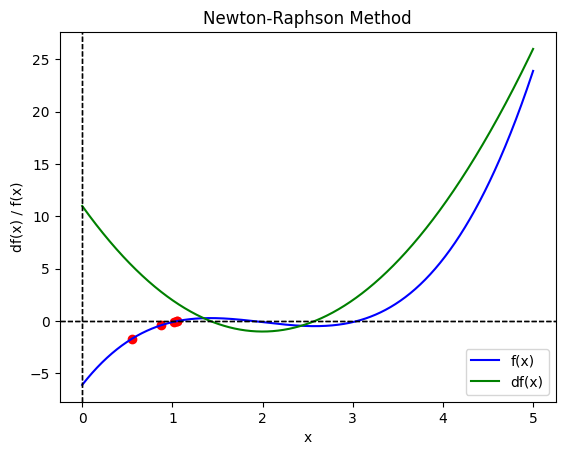

In [ ]:
def df(x):
    return 3*x**2 - 12*x + 11

initial = []
fx0 = []

def newton_raphson_method(x0, tol, max_iter=1000):
    for _ in range(max_iter):
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
        
        fx0.append(f(x0))
        initial.append(x0)

        print(x0)

    print("The method did not converge within the maximum number of iterations.")
    return None

# Set the initial guess and tolerance level
x0 = 0
tol = 0.0005

# Find the positive real root using the Newton-Raphson method
root = newton_raphson_method(x0, tol)
print(f"\nThe positive real root is approximately: {root}\n")

plt.plot(x, f(x), label='f(x)', c='blue')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)


plt.plot((x), df(x), label='df(x)', c='green')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)

plt.scatter(initial, fx0, c='red')

plt.xlabel('x')
plt.ylabel('df(x) / f(x)')
plt.title('Newton-Raphson Method')

plt.legend()
plt.show()

**Modified Secant Method**

In [ ]:
def modified_secant_method(x0, delta, tol, max_iter=1000):
  for _ in range(max_iter):
      x1 = x0 - (delta * x0 * f(x0)) / (f(x0 + delta * x0) - f(x0))
      if abs(x1 - x0) < tol:
          return x1
      x0 = x1
      
      print(x0)

  print("The method did not converge within the maximum number of iterations.")
  return None

# Set the initial guess, perturbation factor, and tolerance level
x0 = 1
delta = 1e-4
tol = 0.0005

# Find the positive real root using the modified secant method
root = modified_secant_method(x0, delta, tol)
print(f"The positive real root is approximately: {root}")

1.0500075008751424
1.0543200439369422
The positive real root is approximately: 1.0543507299432044


# Number 2
Make a program to solve this equation:

$$10x_1 + 2x_2 - x_3 = 27$$

$$-3x_1 - 6x_2 + 2x_3 = -61.5$$

$$x_1 + x_2 + 5x_3 = -21.5$$

using these methods:<br>
a. Naive Gauss Elimination<br>
b. LU Decomposition<br>
c. Cholesky

In [ ]:
import numpy as np

A = np.array([[10, 2, -1],
              [-3, 6, 2],
              [1, 1, 5]])

b = np.array([27, -61.5, -21.5])

**1. Naive Gauss Elimination**

In [ ]:
# Augment the matrix A with vector b
augmented_matrix = np.column_stack((A, b))

# Perform Gaussian elimination
n = len(b)
for i in range(n):
    for j in range(i + 1, n):
        factor = augmented_matrix[j, i] / augmented_matrix[i, i]
        augmented_matrix[j, :] -= factor * augmented_matrix[i, :]

# Perform back substitution
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = augmented_matrix[i, n] / augmented_matrix[i, i]
    for j in range(i - 1, -1, -1):
        augmented_matrix[j, n] -= augmented_matrix[j, i] * x[i]

# Print the solution
print("The solution is:")
for i in range(n):
    print(f"x{i+1} =", x[i])


The solution is:
x1 = 3.7693498452012384
x2 = -7.157894736842106
x3 = -3.6222910216718267


**2. LU Decomposition**

In [ ]:
from scipy.linalg import lu_factor, lu_solve

# Perform LU decomposition on A
lu, piv = lu_factor(A)

# Solve the system using LU decomposition
x = lu_solve((lu, piv), b)

# Print the solution
print("The solution is:")
for i in range(len(x)):
    print(f"x{i+1} =", x[i])


The solution is:
x1 = 3.7693498452012384
x2 = -7.157894736842106
x3 = -3.6222910216718267


**3. Cholesky**

In [ ]:
def cholesky(A):
    n = len(A)
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i, j] = np.sqrt(A[i, j] - np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j] - np.sum(L[i, :j]*L[j, :j])) / L[j, j]
    return L

def forward_substitution(L, b):
    n = len(L)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def back_substitution(L, y):
    n = len(L)
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (y[i] - np.dot(L[i+1:, i], x[i+1:])) / L[i, i]
    return x

L = cholesky(A)
y = forward_substitution(L, b)
x = back_substitution(L, y)

# Verify the solution
residual = np.allclose(np.dot(L.T, x), y)
print("Residual check:", residual)

# Print the solution
print("The solution is:")
print("x1 =", x[0])
print("x2 =", x[1])
print("x3 =", x[2])

Residual check: True
The solution is:
x1 = -0.03218884120171755
x2 = -9.87982832618026
x3 = -2.3175965665236045


In [ ]:
# Perform Cholesky decomposition on A
L = np.linalg.cholesky(A)

# Solve Ly = b using forward substitution
y = np.linalg.solve(L, b)

# Solve L^T x = y using back substitution
x = np.linalg.solve(L.T, y)

print(np.allclose(np.dot(L.T, x), y))

# Print the solution
print("The solution is:")
print("x1 =", x[0])
print("x2 =", x[1])
print("x3 =", x[2])

True
The solution is:
x1 = -0.03218884120171755
x2 = -9.87982832618026
x3 = -2.317596566523604


In [ ]:
# Inverse Matrix
inv = np.linalg.inv(A)
print(inv)

[[ 0.08668731 -0.03405573  0.03095975]
 [ 0.05263158  0.15789474 -0.05263158]
 [-0.02786378 -0.0247678   0.20433437]]
